# Imports

In [1]:
#setting a random Seed
import numpy as np
np.random.seed(42)
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

#Pointing custom import path taken from #https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
import sys
sys.path.append('../modules/')
import eda
import matplotlib.pyplot as plt


# Loading in data
This portion of the notebook loads in a random image from each class: 'glioma', 'meningioma', 'notumor', 'pituitary' and lists the number of images within each class with in the raining and testing datasets.

## Training data set

In [2]:
#specify if we want to use the train data or test data
train_dataset = 'Training'

In [3]:
train_folders = eda.folders(train_dataset)
train_folders

['glioma', 'meningioma', 'notumor', 'pituitary']

glioma has 1321 files


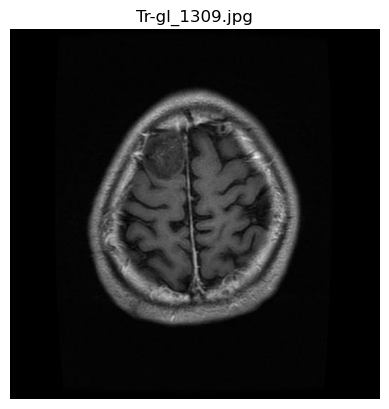

meningioma has 1339 files


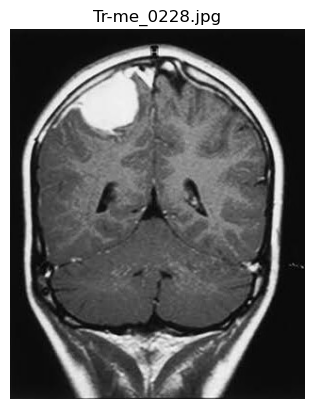

notumor has 1595 files


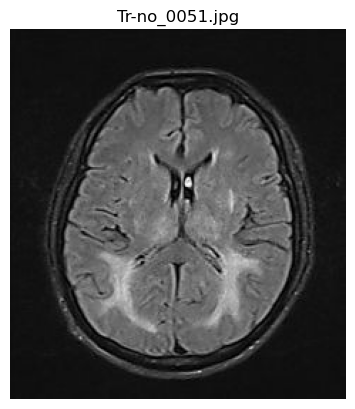

pituitary has 1457 files


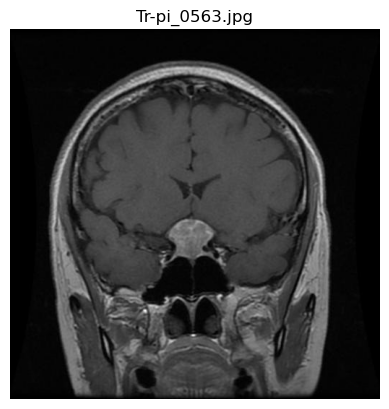

In [4]:
eda.image_len(train_folders)

Here we see within the training dataset we see each class is relatively balanced. Each class has about 1300-1500 images

______________________________________________________________________________

## Testing dataset 

In [5]:
test_dataset = 'Testing'

In [6]:
test_folders = eda.folders(test_dataset)
test_folders

['glioma', 'meningioma', 'notumor', 'pituitary']

glioma has 300 files


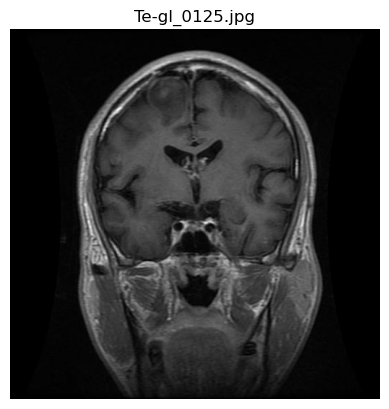

meningioma has 306 files


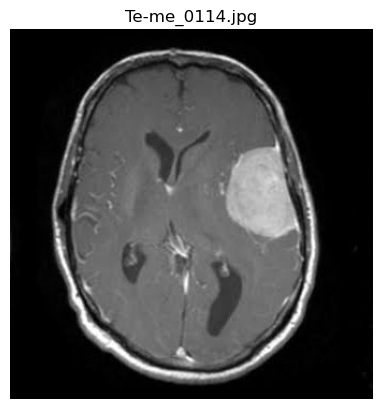

notumor has 405 files


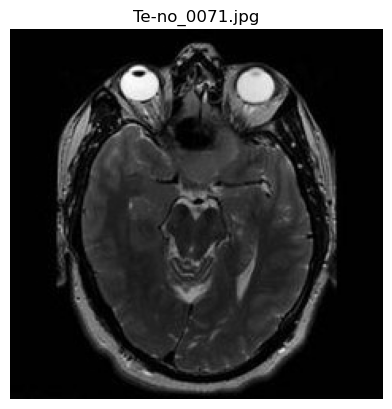

pituitary has 300 files


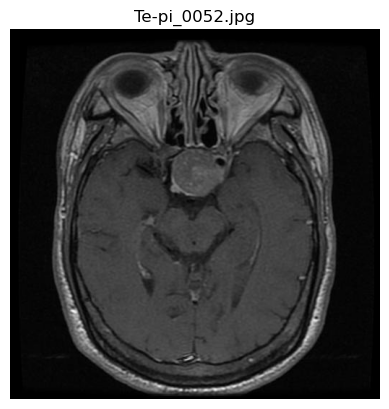

In [7]:
eda.image_len(test_folders, 'Testing')

Here we see within the testing dataset we see each class is relatively balanced. Each class has about 1300-1500 images

____________________________________________________________________________________________
# Average pixel value
This portion re-uses code from a previous [project](https://github.com/DerikVo/DSI_project_4_plant_disease/blob/main/notebooks/01_Potato_PlantVillageEDA.ipynb). The code was originally developed by chat GPT 4 with the prompt:  "I have an image data set that I want to do EDA on. How can I average out the pixel values of all the images in a class. python keras." The code has since been corrected, adapted, and changed into a custom module for this project.

The purpose of finding the average pixel value of each class is to identify if there is a significant difference between each class. By knowing how each class is different we can utilize that to determine what type a tumor an image has.

In [8]:
#assigning the average pixel values for the no tumor class
notumor = eda.avg_images('notumor')
#assigning the average pixel values for the Pituitary tumor class
pituitary_tumor  = eda.avg_images('Pituitary')
#assigning the average pixel values for the Meningioma tumor class
meningioma_tumor = eda.avg_images('Meningioma')
#assigning the average pixel values for the Glioma tumor class
glioma_tumor = eda.avg_images('Glioma')

Found 1595 images belonging to 1 classes.
Found 1457 images belonging to 1 classes.
Found 1339 images belonging to 1 classes.
Found 1321 images belonging to 1 classes.


## No tumor

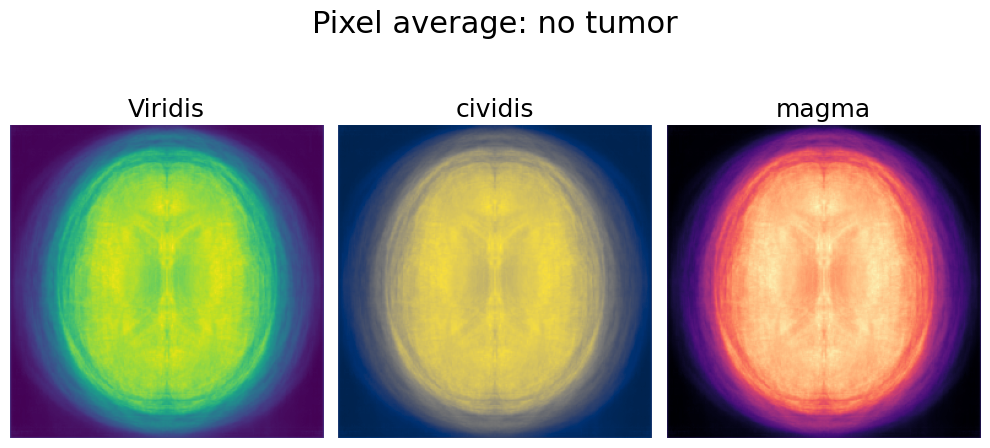

In [9]:
#display colorblind friendly copies of the no tumor class
eda.display_image(notumor, 'no tumor')

## Pituitary Tumor

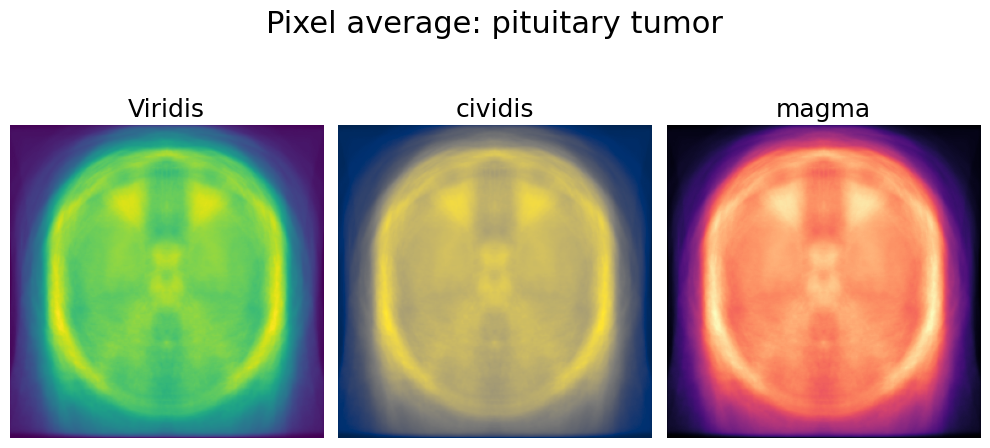

In [10]:
#display colorblind friendly copies of the pituitary tumor class
eda.display_image(pituitary_tumor, 'pituitary tumor')

## Meningioma

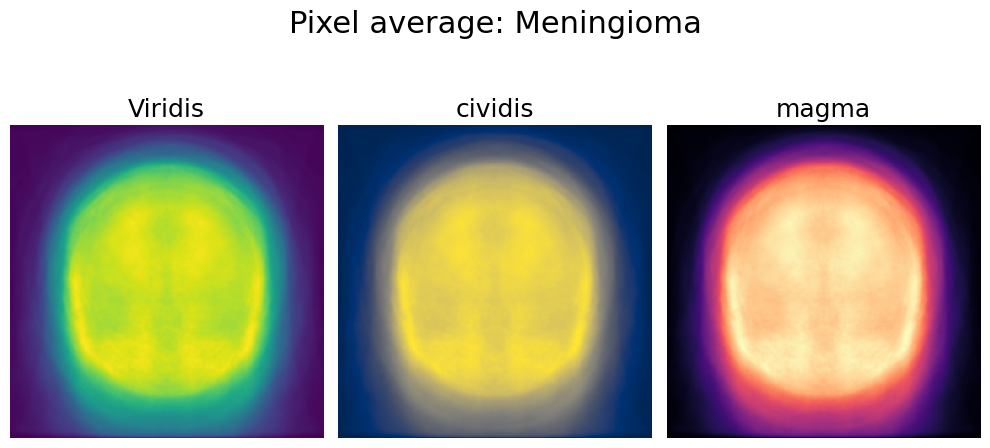

In [11]:
#display colorblind friendly copies of the meningioma tumor class
eda.display_image(meningioma_tumor, 'Meningioma')

## Glioma

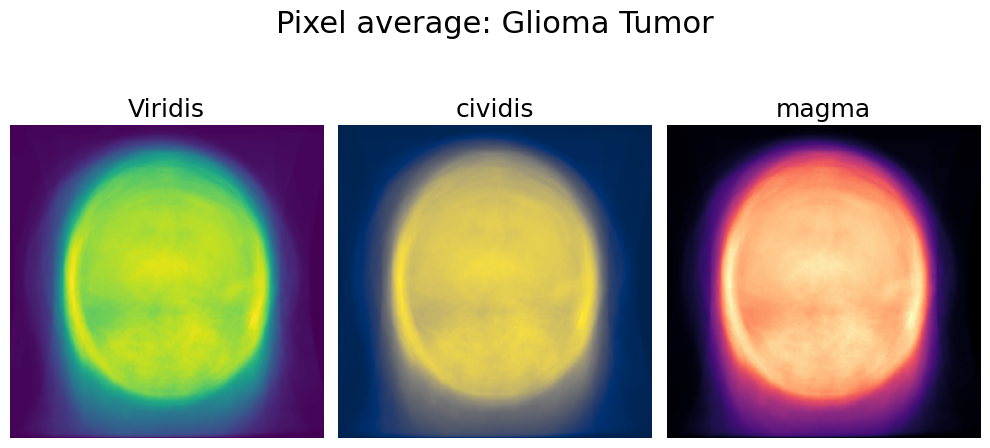

In [12]:
#display colorblind friendly copies of the glioma tumor class
eda.display_image(glioma_tumor, 'Glioma Tumor')

## Interpretation

As we can see there is a clear difference between each class of images here. The no tumor class looks most like a clear image while the other types of tumors begin to lose details. Especially the Giloma Tumor and Meningioma Tumor, which begins to look like a blurry dot. This difference between these two tumor types and no tumor could be due to a suspicion of a tumor can warrant taking scans at different angles. This would explain why there are some differences between the classes. When reflecting on our research [Morgan (2022)](https://www.cancer.gov/rare-brain-spine-tumor/blog/2022/neuroradiology) suggest an initial MRI scan is used to determine how to proceed, so if the brain is healthy then there is no need for additional imaging. Therefore that explains why the no tumor class is generally more detailed than other images.


# Examine contrast difference between a brain with and without a tumor
This portion displays 3 of the same images to support varying levels of colorblindness: Such as protanopia, deuteranopia, and tritanopia.

The purpose of this finding the differences between a healthy brain and a brain with a specific tumor can help us see what distinguishable features there are between a brain without a tumor and a brain with a class of tumor.

## Created contrast images between a brain with no tumors and a brain with a tumor within each class

In [13]:
#Get the contrast between a brain with no tumor and a glioma tumor
glioma_contrast = eda.image_contrast(glioma_tumor, notumor)
#Get the contrast between a brain with a no tumor and a pituitary tumor
pituitary_contrast = eda.image_contrast(pituitary_tumor, notumor)
#Get the contrast between a brain with a no tumor and a meningioma tumor
meningioma_contrast = eda.image_contrast(meningioma_tumor, notumor)

## Meningioma and no tumor contrast

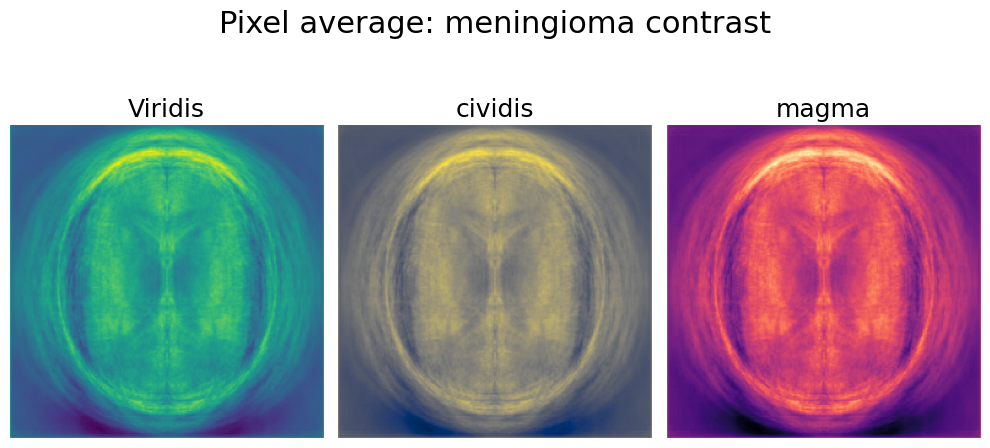

In [14]:
#display colorblind friendly copies of the meningioma contrast
eda.display_image(meningioma_contrast, 'meningioma contrast')

Here we can see some mass in the bottom of the head that has two slightly dark circles. This can be assumed to be the back of the head
_____________________________________________________________________________________________________________

## Gioma and no tumor contrast

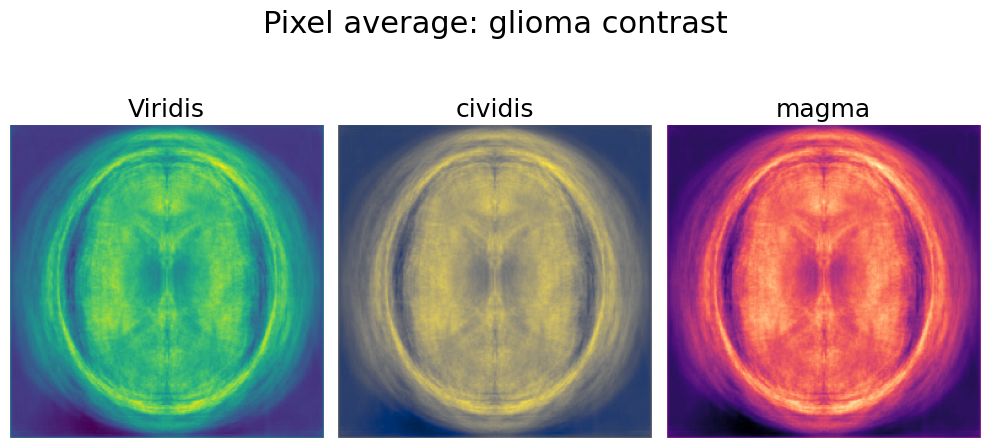

In [15]:
#display colorblind friendly copies of the glioma contrast
eda.display_image(glioma_contrast, 'glioma contrast')

The Meningioma appears to be relatively similar to the Glioma. With the Glioma, the contrast has a slight difference on the top being less bright while the bottom is brighter.
___________________________________________________________________________________________________________________

## Gioma and no tumor contrast

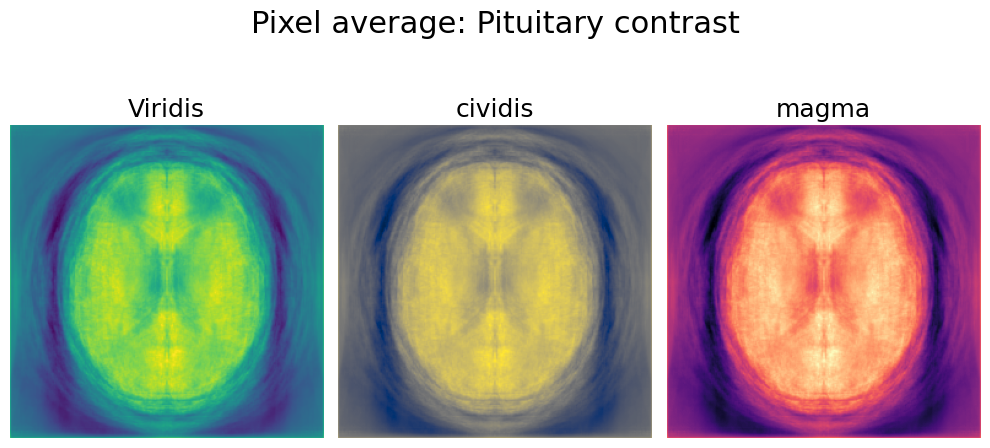

In [16]:
#display colorblind friendly copies of the pituitary contrast
eda.display_image(pituitary_contrast, 'Pituitary contrast')

Here we can see two black spots on the top of the brain. After looking at our sample images I conclude these are eye balls. Which has a clear difference between the other two image sets.

_________________________________________________________________________________________-
# Conclusion

Overall, our classes are balanced between the classes 'glioma', 'meningioma', 'notumor', and 'pituitary' in both our training and testing datasets. Additionally when looking at the average pixel value and the contrast between those average we can see some distinct features within those classes. This indicates that there are features that our model can learn to distinguish images into classes.

We will know move onto building a [baseline model](../Notebooks/02_Baseline_Model.ipynb) to compare our results.